# Dendrite.ai Task

In [2]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
## Parsing the json file
from striprtf.striprtf import rtf_to_text
with open("algoparams_from_ui.json.rtf") as infile:
    content = infile.read()
    text = rtf_to_text(content)
print(text)  

{
    "session_name": "test",
    "session_description": "test",
    "design_state_data": {

      "session_info" : {
        "project_id": "1",
        "experiment_id": "kkkk-11",
        "dataset":"iris_modified.csv",
        "session_name": "test",
        "session_description": "test"
        },

      "target": {
        "prediction_type": "Regression",
        "target": "petal_width",
        "type":"regression",
        "partitioning": true
      },
      "train": {
        "policy": "Split the dataset",
        "time_variable": "sepal_length",
        "sampling_method": "No sampling(whole data)",
        "split": "Randomly",
        "k_fold": false,
        "train_ratio": 0,
        "random_seed": 0
      },
      "metrics": {
        "optomize_model_hyperparameters_for": "AUC",
        "optimize_threshold_for": "F1 Score",
        "compute_lift_at": 0,
        "cost_matrix_gain_for_true_prediction_true_result": 1,
        "cost_matrix_gain_for_true_prediction_false_result": 0,

In [4]:
data= json.loads(text)

# Data extracting and preprocessing

In [5]:
df=pd.read_csv("iris.csv")

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


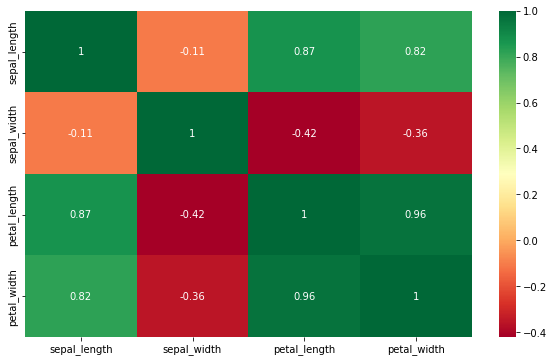

In [7]:
cor=df.corr()
top_cor=cor.index
plt.figure(figsize=(10,6))
g=sns.heatmap(df[top_cor].corr(),annot=True,cmap='RdYlGn')

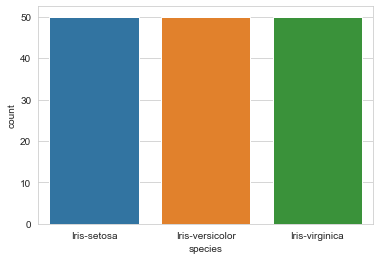

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='species',data=df)
plt.show()

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df = pd.get_dummies(df,columns=['species'],drop_first = True)

## Reading json files

In [13]:
Target = data['design_state_data']['target']
print(Target)

{'prediction_type': 'Regression', 'target': 'petal_width', 'type': 'regression', 'partitioning': True}


In [14]:
## Models with their hypermeter
for i in data['design_state_data']['algorithms']:
    print(data['design_state_data']['algorithms'][i])

{'model_name': 'Random Forest Classifier', 'is_selected': False, 'min_trees': 10, 'max_trees': 30, 'feature_sampling_statergy': 'Default', 'min_depth': 20, 'max_depth': 30, 'min_samples_per_leaf_min_value': 5, 'min_samples_per_leaf_max_value': 50, 'parallelism': 0}
{'model_name': 'Random Forest Regressor', 'is_selected': True, 'min_trees': 10, 'max_trees': 20, 'feature_sampling_statergy': 'Default', 'min_depth': 20, 'max_depth': 25, 'min_samples_per_leaf_min_value': 5, 'min_samples_per_leaf_max_value': 10, 'parallelism': 0}
{'model_name': 'Gradient Boosted Trees', 'is_selected': False, 'num_of_BoostingStages': [67, 89], 'feature_sampling_statergy': 'Fixed number', 'learningRate': [], 'use_deviance': True, 'use_exponential': False, 'fixed_number': 22, 'min_subsample': 1, 'max_subsample': 2, 'min_stepsize': 0.1, 'max_stepsize': 0.5, 'min_iter': 20, 'max_iter': 40, 'min_depth': 5, 'max_depth': 7}
{'model_name': 'Gradient Boosted Trees', 'is_selected': False, 'num_of_BoostingStages': [67, 

In [15]:
## Models name
for i in data['design_state_data']['algorithms']:
    print(i)

RandomForestClassifier
RandomForestRegressor
GBTClassifier
GBTRegressor
LinearRegression
LogisticRegression
RidgeRegression
LassoRegression
ElasticNetRegression
xg_boost
DecisionTreeRegressor
DecisionTreeClassifier
SVM
SGD
KNN
extra_random_trees
neural_network


# Splitting data into training and testing set

In [16]:
X=df.drop('petal_width',axis=1)
y=df['petal_width']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Building models

In [18]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
import xgboost
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier,ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split 

In [19]:
## Using RandomForestRegressor
rfr=RandomForestRegressor(n_estimators = 20,min_samples_leaf = 10,max_depth=25)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=10, n_estimators=20)

In [20]:
y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error for Random_Forest_Regressor :  {mse}")
print(f"Root Mean Squared Error Random_Fores_tRegressor : {rmse}")
print(f"Mean Absolute Error for Random_Forest_Regressor :{mae}")

Mean Squared Error for Random_Forest_Regressor :  0.02606874347253137
Root Mean Squared Error Random_Fores_tRegressor : 0.16145817871056073
Mean Absolute Error for Random_Forest_Regressor :0.1395913002211012


In [21]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error for Linear_Regression :  {mse}")
print(f"Root Mean Squared Error Linear_Regression : {rmse}")
print(f"Mean Absolute Error for Linear_Regression : {mae}")

Mean Squared Error for Linear_Regression :  0.029340294418947133
Root Mean Squared Error Linear_Regression : 0.17129008850177857
Mean Absolute Error for Linear_Regression : 0.1325943679374639


In [23]:
###Using Gradient Boosting Regressor
gbtr = GradientBoostingRegressor(n_estimators= 89,max_depth=7)
gbtr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=7, n_estimators=89)

In [24]:
y_pred = gbtr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error for Gradient_Boosting_Regressor :  {mse}")
print(f"Root Mean Squared Error Gradient_Boosting_Regressor : {rmse}")
print(f"Mean Absolute Error for Gradient_Boosting_Regressor : {mae}")

Mean Squared Error for Gradient_Boosting_Regressor :  0.04015674994861551
Root Mean Squared Error Gradient_Boosting_Regressor : 0.20039149170714687
Mean Absolute Error for Gradient_Boosting_Regressor : 0.16382716969260394


In [25]:
## Lasso regression
lsr = Lasso(max_iter = 50)
lsr.fit(X_train,y_train)

Lasso(max_iter=50)

In [26]:
y_pred = lsr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error for Lasso Regression : {mse}")
print(f"Root Mean Squared Error Lasso Regression : {rmse}")
print(f"Mean Absolute Error for Lasso Regression :{mae}")

Mean Squared Error for Lasso Regression : 0.4267745876578168
Root Mean Squared Error Lasso Regression : 0.653279869319281
Mean Absolute Error for Lasso Regression :0.5740068103493747


In [27]:
## Ridge regression
rdg = Ridge(max_iter = 50)
rdg.fit(X_train,y_train)

Ridge(max_iter=50)

In [28]:
y_pred = rdg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error for Ridge Regression : {mse}")
print(f"Root Mean Squared Error Ridge Regression : {rmse}")
print(f"Mean Absolute Error for Ridge Regression :{mae}")

Mean Squared Error for Ridge Regression : 0.0333882003269742
Root Mean Squared Error Ridge Regression : 0.18272438350415687
Mean Absolute Error for Ridge Regression :0.13722699057951743


In [29]:
#Using Xgboost Regression
import xgboost as xg
xgb = xg.XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [30]:
y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error for Xgboost_Regression : {mse}")
print(f"Root Mean Squared Error Xgboost_Regression : {rmse}")
print(f"Mean Absolute Error for Xgboost_Regression :{mae}")

Mean Squared Error for Xgboost_Regression : 0.04094114414103808
Root Mean Squared Error Xgboost_Regression : 0.20233918093399034
Mean Absolute Error for Xgboost_Regression :0.1672906299432119


In [31]:
#Using Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf = 12)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=12)

In [32]:
y_pred = dtr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error for  Decision_Tree_Regressor : {mse}")
print(f"Root Mean Squared Error  Decision_Tree_Regressor : {rmse}")
print(f"Mean Absolute Error for  Decision_Tree_Regressor : {mae}")

Mean Squared Error for  Decision_Tree_Regressor : 0.030028242965825378
Root Mean Squared Error  Decision_Tree_Regressor : 0.17328659199668445
Mean Absolute Error for  Decision_Tree_Regressor : 0.13016605616605614


In [33]:
#Using SVR Regression
svr = SVR(kernel = 'rbf',gamma = 7,max_iter = 7)
svr.fit(X_train,y_train)

C:\Users\91789\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVR(gamma=7, max_iter=7)

In [34]:
pred = svr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error for SVR Regression : {mse}")
print(f"Root Mean Squared Error SVR Regression : {rmse}")
print(f"Mean Absolute Error for SVR Regressionr : {mae}")

Mean Squared Error for SVR Regression : 0.030028242965825378
Root Mean Squared Error SVR Regression : 0.17328659199668445
Mean Absolute Error for SVR Regressionr : 0.13016605616605614
